In [138]:
import numpy as np
import matplotlib.pyplot as plt

In [139]:
def predicted(x1,x2,w1,w2):
    s=x1*w1+x2*w2
    if s>=0.5:
        return 1
    else:
        return 0    

In [140]:
def error(x1,x2,w1,w2,y):
    return y-predicted(x1,x2,w1,w2)

In [141]:
def lossfun(x1,x2,w1,w2,y):
    sum=0
    for i in range(len(x1)):
        sum=sum+error(x1[i],x2[i],w1,w2,y[i])
    return sum

In [142]:
def training(x1,x2,y,lr,iw1,iw2):
    w1=iw1
    w2=iw2
    losslist=[]
    for epoch in (range(100)):
        loss=lossfun(x1,x2,w1,w2,y)
        losslist.append(loss)
        for i in range(len(x1)):
            w1=w1+lr*error(x1[i],x2[i],w1,w2,y[i])*x1[i]
            w2=w2+lr*error(x1[i],x2[i],w1,w2,y[i])*x2[i]
    return w1,w2,losslist  

In [143]:
def linepoints(x1,w1,w2,th):
    x2=[]
    for i in range(len(x1)):
        x2.append((0.5-x1[i]*w1)/w2)
    return x2     
    

# OR function

In [144]:
x1=[0,0,1,1]
x2=[0,1,0,1]
y=[0,1,1,1]

In [145]:
w1,w2,losses=training(x1,x2,y,0.01,0.5,0.3)

In [146]:
print(w1,w2)

0.5 0.5000000000000001


In [147]:
print(losses)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [148]:
print(predicted(0,0,w1,w2))

0


In [149]:
print(predicted(0,1,w1,w2))

1


In [150]:
print(predicted(1,0,w1,w2))

1


In [151]:
print(predicted(1,1,w1,w2))

1


In [152]:
epochs=[x for x in range(len(losses))]

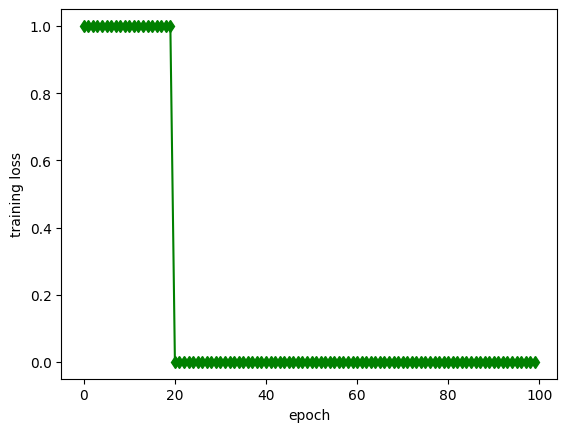

In [153]:
plt.plot(epochs,losses,color='g',marker='d')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.show()

In [154]:
x2pred=linepoints(x1,w1,w2,0.5)

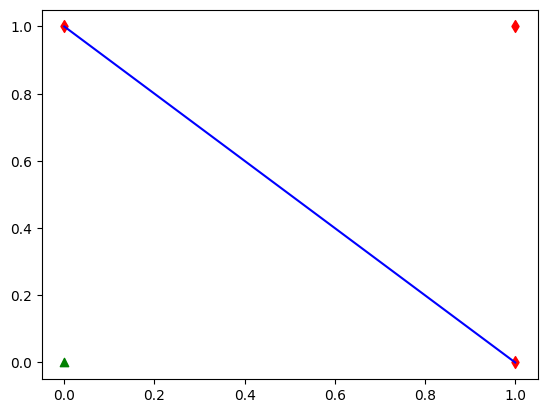

In [155]:
plt.scatter(x1[0],x2[0],color='g',marker='^')
plt.scatter(x1[1:],x2[1:],color='r',marker='d')
plt.plot(x1,x2pred,color='b')
plt.show()

# AND function

In [156]:
x1=[0,0,1,1]
x2=[0,1,0,1]
y=[0,0,0,1]

In [157]:
w1,w2,losses=training(x1,x2,y,0.01,0.6,0.7)

In [158]:
print(w1,w2)

0.4999999999999999 0.4999999999999998


In [159]:
print(losses)

[-2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [160]:
epochs=[x for x in range(len(losses))]

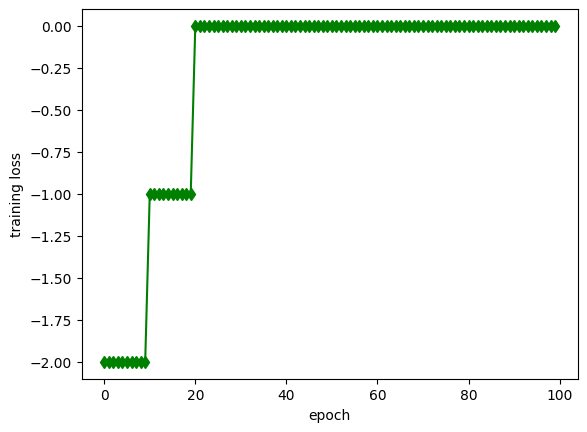

In [161]:
plt.plot(epochs,losses,color='g',marker='d')
plt.xlabel('epoch')
plt.ylabel('training loss')
plt.show()

In [162]:
x2pred=linepoints(x1,w1,w2,0.5)

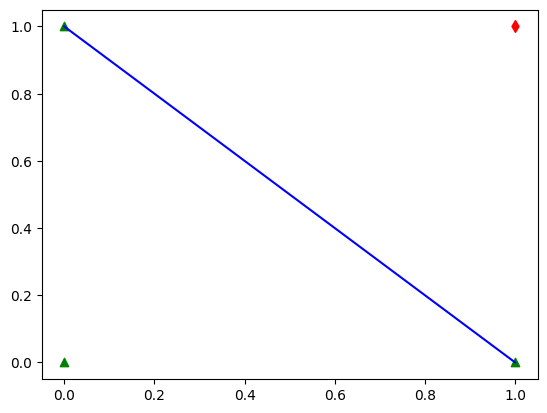

In [163]:
plt.scatter(x1[0:3],x2[0:3],color='g',marker='^')
plt.scatter(x1[3],x2[3],color='r',marker='d')
plt.plot(x1,x2pred,color='b')
plt.show()

# With Diabeties Data set

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv("diabetes.csv")

In [166]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [167]:
def predicted(x1, x2, x3, x4, x5, x6, x7, x8, w1, w2, w3, w4, w5, w6, w7, w8):
    s=x1*w1+x2*w2+x3*w3+x4*w4+x5*w5+x6*w6+x7*w7+x8*w8
    if s>=0.5:
        return 1
    else:
        return 0    

In [168]:
def error(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y):
    return y-predicted(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8)

In [169]:
def lossfun(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y):
    sum=0
    for i in range(len(x1)):
        sum=sum+error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])
    return sum

In [197]:
def training(x1,x2,x3,x4,x5,x6,x7,x8,y,lr,iw1,iw2,iw3,iw4,iw5,iw6,iw7,iw8):
    w1=iw1
    w2=iw2
    w3=iw3
    w4=iw4
    w5=iw5
    w6=iw6
    w7=iw7
    w8=iw8
    losslist=[]
    for epoch in (range(100)):
        loss=lossfun(x1,x2,x3,x4,x5,x6,x7,x8,w1,w2,w3,w4,w5,w6,w7,w8,y)
        losslist.append(loss)
        if(loss == 0):
            break
        
        for i in range(len(x1)):
            w1=w1+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x1[i]
            w2=w2+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x2[i]
            w3=w3+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x3[i]
            w4=w4+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x4[i]
            w5=w5+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x5[i]
            w6=w6+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x6[i]
            w7=w7+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x7[i]
            w8=w8+lr*error(x1[i],x2[i],x3[i],x4[i],x5[i],x6[i],x7[i],x8[i],w1,w2,w3,w4,w5,w6,w7,w8,y[i])*x8[i]
    return w1,w2,w3,w4,w5,w6,w7,w8,losslist  

In [198]:
# def linepoints(x1,w1,w2,th):
#     x2=[]
#     for i in range(len(x1)):
#         x2.append((0.5-x1[i]*w1)/w2)
#     return x2     

In [199]:
df = pd.read_csv("diabetes.csv")

In [200]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [201]:
x1 = df['Pregnancies'].values
x2 = df['Glucose'].values
x3 = df['BloodPressure'].values
x4 = df['SkinThickness'].values
x5 = df['Insulin'].values
x6 = df['BMI'].values
x7 = df['DiabetesPedigreeFunction'].values
x8 = df['Age'].values
y = df['Outcome'].values

In [202]:
# num_features = 8

# # Initialize weights with small random values from a normal distribution
# weights = np.random.randn(num_features) * 1  # Small values close to zero

In [203]:
# print(weights)

In [204]:
# w1,w2,w3,w4,w5,w6,w7,w8 = weights;

In [205]:
# w1,w2,w3,w4,w5,w6,w7,w8,losses = training(x1,x2,x3,x4,x5,x6,x7,x8,y,0.01,w1,w2,w3,w4,w5,w6,w7,w8);

In [206]:
w1,w2,w3,w4,w5,w6,w7,w8,losses= training(x1,x2,x3,x4,x5,x6,x7,x8,y,0.0001,0.5,0.4,0.6,0.5,0.3,0.4,0.6,0.5)


In [207]:
print(w1,w2,w3,w4,w5,w6,w7,w8)

0.12890000000000704 0.004299999999999681 0.009899999999999343 -0.004700000000000348 -0.0027999999999995468 -0.0025100000000000794 0.5817691000000071 -0.037999999999998924


In [208]:
print (losses)

[-500, -48, -105, -82, -13, -47, -5, -237, -188, -214, 20, -58, -190, 9, -148, 82, -186, -267, -126, -140, -2, 13, -103, -124, -233, -33, -278, -177, 110, 26, 21, -130, -145, 95, -26, -175, -23, -105, -34, -398, -178, -203, -132, -155, -199, -105, -141, -314, -404, -382, -178, -160, -146, 45, -378, -115, -216, -137, -38, -334, -32, -295, 68, 163, -272, -119, -57, 165, 85, -336, 104, -417, -70, 148, -172, 61, -13, -28, 131, 28, 84, 86, -12, -420, -201, -211, -19, -76, 0]
